In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

from sklearn.metrics import classification_report, f1_score, recall_score, average_precision_score, precision_score

### 1. 데이터 로드 및 기본 탐색

In [80]:
df = pd.read_csv("../creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [82]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


======== Class Distribution ========
Normal (0) : 284315
Fraud (1) : 492
Fraud Ratio: 0.173%


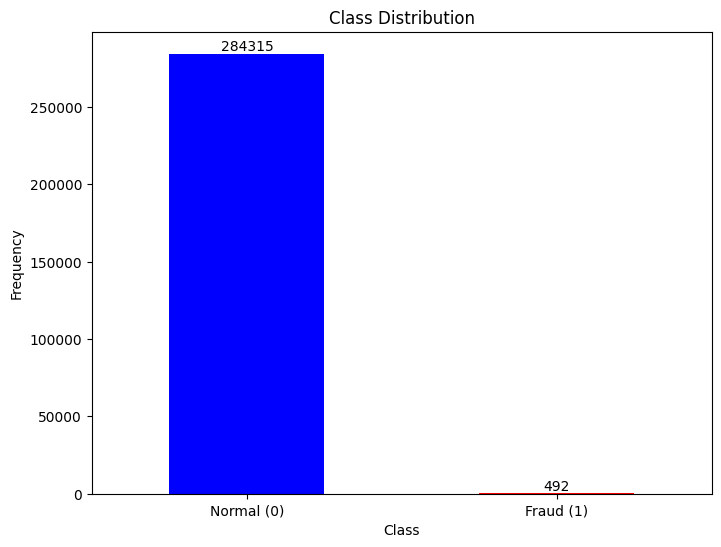

In [83]:
count_classes = pd.Series(df["Class"]).value_counts(sort = True)

print("======== Class Distribution ========")
print(f"Normal (0) : {count_classes[0]}")
print(f"Fraud (1) : {count_classes[1]}")
print(f"Fraud Ratio: {count_classes[1] / len(df) * 100:.3f}%")

plt.figure(figsize = (8, 6))
count_classes.plot(kind = "bar", rot = 0, color = ["blue", "red"])
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal (0)", "Fraud (1)"])
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.text(0, count_classes[0], f"{count_classes[0]}", ha = "center", va = "bottom")
plt.text(1, count_classes[1], f"{count_classes[1]}", ha = "center", va = "bottom")

plt.show()

### 2. 샘플링

======== Class Distribution after Sampling ========
Normal (0) : 10000
Fraud (1) : 492
Fraud Ratio: 4.689%


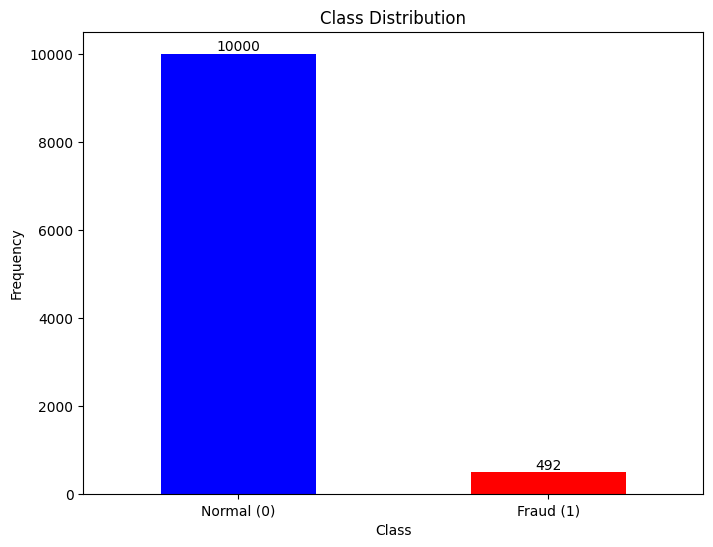

In [84]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

normal_sample = normal.sample(n = 10000, random_state = 42)

df_new = pd.concat([fraud, normal_sample], axis = 0)

count_classes = pd.Series(df_new["Class"]).value_counts(sort = True)

print("======== Class Distribution after Sampling ========")
print(f"Normal (0) : {count_classes[0]}")
print(f"Fraud (1) : {count_classes[1]}")
print(f"Fraud Ratio: {count_classes[1] / len(df_new) * 100:.3f}%")

plt.figure(figsize = (8, 6))
count_classes.plot(kind = "bar", rot = 0, color = ["blue", "red"])
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal (0)", "Fraud (1)"])
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.text(0, count_classes[0], f"{count_classes[0]}", ha = "center", va = "bottom")
plt.text(1, count_classes[1], f"{count_classes[1]}", ha = "center", va = "bottom")

plt.show()

### 3. 데이터 전처리

In [85]:
scaler = StandardScaler()
df_new["Amount_Scaled"] = scaler.fit_transform(df_new[["Amount"]])
df_new = df_new.drop(["Amount"], axis = 1)

X = df_new.drop("Class", axis = 1)
y = df_new["Class"]

print(X.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount_Scaled'],
      dtype='object')


### 4. 학습 데이터와 테스트 데이터 분할

Training set size: 8393
Testing set size: 2099
======== Training set Class Distribution ========
Normal (0) : 7999
Fraud (1) : 394
Fraud Ratio: 4.694%


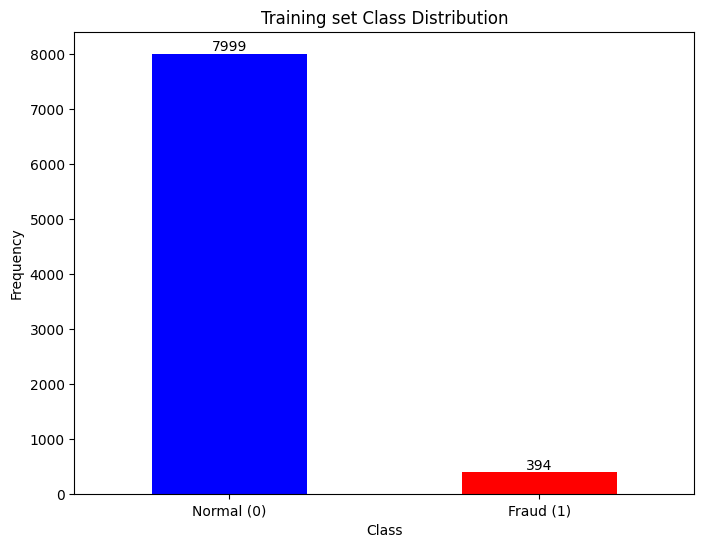

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

count_classes = pd.Series(y_train).value_counts(sort = True)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("======== Training set Class Distribution ========")
print(f"Normal (0) : {count_classes[0]}")
print(f"Fraud (1) : {count_classes[1]}")
print(f"Fraud Ratio: {count_classes[1] / len(y_train) * 100:.3f}%")

plt.figure(figsize = (8, 6))
count_classes.plot(kind = "bar", rot = 0, color = ["blue", "red"])
plt.title("Training set Class Distribution")
plt.xticks(range(2), ["Normal (0)", "Fraud (1)"])
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.text(0, count_classes[0], f"{count_classes[0]}", ha = "center", va = "bottom")
plt.text(1, count_classes[1], f"{count_classes[1]}", ha = "center", va = "bottom")

plt.show()

### 5. SMOTE 적용

In [87]:
sm = SMOTE(random_state = 42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original fraud transaction: {len(y_train[y_train == 1])}")
print(f"Resampled fraud transaction: {len(y_train_res[y_train_res == 1])}")

Original fraud transaction: 394
Resampled fraud transaction: 7999


### 6. 모델 학습

In [88]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1, verbose = 0),
    "XGBoost": XGBClassifier(n_estimators = 100, random_state = 42, n_jobs = -1, eval_metric = 'logloss'),
    "LightGBM": LGBMClassifier(n_estimators = 100, random_state = 42, n_jobs = -1, verbose = 0)
}

print(f"{'Model':<15} | {'Recall':<10} | {'F1-Score':<10} | {'PR-AUC':<10}")
print("-" * 55)

best_model_name = ""
best_score = 0

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    
    recall = recall_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    pr_auc = average_precision_score(y_test, pred_proba)
    
    print(f"{name:<15} | {recall:.4f}     | {f1:.4f}     | {pr_auc:.4f}")
    
    if pr_auc > best_score:
        best_score = pr_auc
        best_model_name = name

print("-" * 55)
print(f"Best Model: {best_model_name}")

Model           | Recall     | F1-Score   | PR-AUC    
-------------------------------------------------------
RandomForest    | 0.8878     | 0.9158     | 0.9537
XGBoost         | 0.8878     | 0.8923     | 0.9567
LightGBM        | 0.8878     | 0.8878     | 0.9569
-------------------------------------------------------
Best Model: LightGBM


In [89]:
param_dist = {
    'num_leaves': randint(20, 50),
    'max_depth': randint(3, 15),
    'min_child_samples': randint(20, 100),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm = LGBMClassifier(random_state = 42, n_jobs=-1, verbose=-1)

random_search = RandomizedSearchCV(
    estimator = lgbm,
    param_distributions = param_dist,
    n_iter = 30,
    scoring = 'f1',
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
    random_state = 42,
    n_jobs = -1,
    verbose = 1
)

random_search.fit(X_train_res, y_train_res)

print(f"Best Parameter : {random_search.best_params_}")
print(f"Best F1 Score(CV): {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_
final_pred = best_model.predict(X_test)
final_proba = best_model.predict_proba(X_test)[:, 1]

print("======== Model Performance ========")
print(classification_report(y_test, final_pred))
print(f"PR-AUC: {average_precision_score(y_test, final_proba):.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameter : {'colsample_bytree': np.float64(0.8281323365878769), 'learning_rate': 0.1, 'max_depth': 11, 'min_child_samples': 22, 'n_estimators': 300, 'num_leaves': 25, 'subsample': np.float64(0.8532241907732696)}
Best F1 Score(CV): 0.9976
======== Model Performance ========
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.94      0.89      0.91        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.95      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC: 0.9571


In [90]:
final_proba = best_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.3, 0.7, 0.05)

print(f"{'Threshold':<10} | {'F1-Score':<10} | {'Recall':<10} | {'Precision':<10}")
print("-" * 50)

best_th = 0.5
best_f1 = 0

for th in thresholds:
    custom_pred = np.where(final_proba >= th, 1, 0)
    
    f1 = f1_score(y_test, custom_pred, pos_label=1)
    recall = recall_score(y_test, custom_pred, pos_label=1)
    precision = precision_score(y_test, custom_pred, pos_label=1)
    
    print(f"{th:.2f}       | {f1:.4f}     | {recall:.4f}     | {precision:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_th = th

print("-" * 50)
print(f"Best Threshold: {best_th} (Best F1: {best_f1:.4f})")

Threshold  | F1-Score   | Recall     | Precision 
--------------------------------------------------
0.30       | 0.8934     | 0.8980     | 0.8889
0.35       | 0.8980     | 0.8980     | 0.8980
0.40       | 0.9026     | 0.8980     | 0.9072
0.45       | 0.9016     | 0.8878     | 0.9158
0.50       | 0.9110     | 0.8878     | 0.9355
0.55       | 0.9110     | 0.8878     | 0.9355
0.60       | 0.9110     | 0.8878     | 0.9355
0.65       | 0.9053     | 0.8776     | 0.9348
--------------------------------------------------
Best Threshold: 0.49999999999999994 (Best F1: 0.9110)
